# TS3: Análisis de Fourier: FFT, desparramo, interpolación y ventaneo.
### Autora: Angelina Fantauzzo Fabio


**Consigna**: 

En esta tarea semanal analizaremos un fenómeno muy particular que se da al calcular la DFT, el efecto de desparramo espectral.  

Luego, haremos el siguiente experimento:

Senoidal de frecuencia 𝑓0=𝑘0∗𝑓𝑆/𝑁=𝑘0.Δ𝑓
potencia normalizada, es decir energía (o varianza) unitaria
Se pide:

**a)** Sea 𝑘0
 

𝑁4
 
𝑁4+0.25
 
𝑁4+0.5
 
Notar que a cada senoidal se le agrega una pequeña desintonía respecto a  Δ𝑓
. Graficar las tres densidades espectrales de potencia (PDS's) y discutir cuál es el efecto de dicha desintonía en el espectro visualizado.

**b)** Verificar la potencia unitaria de cada PSD, puede usar la identidad de Parseval. En base a la teoría estudiada. Discuta la razón por la cual una señal senoidal tiene un espectro tan diferente respecto a otra de muy pocos Hertz de diferencia. 

**c)** Repetir el experimento mediante la técnica de zero padding. Dicha técnica consiste en agregar ceros al final de la señal para aumentar Δ𝑓
 de forma ficticia. Probar agregando un vector de 9*N ceros al final. Discuta los resultados obtenidos.

## Introducciones teóricas

### FFT

### Identidad de Parseval

### Zero padding

El zero padding consiste en añadir ceros al final de una señal para aumentar su longitud. Esto mejora la interpolación de la señal en el dominio de la frecuencia, permitiendo una visualización más detallada y la identificación de características espectrales, aumenta la resolución espectral, no agrega informacion nueva sino que simplemente vemos con más claridad a la señal. 

## Desarollo del código 

**Librerías**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

**Funciones**

In [2]:
def sen(ff, nn, amp = np.sqrt(2), ph =0, dc = 0, fs = 2):
    N = np.arange(nn)
    t = N/fs
    x = dc + amp*np.sin(2*np.pi*ff*t + ph)
    return t,x 

**Variables**

In [3]:
N = 1000
fs = N
delta_f = fs/N #resolucion espectral
Ts = 1/fs

**Señales**

In [12]:
t1,x1 = sen(ff=(N/4 )*delta_f, nn=N, fs=fs)
t2,x2 = sen(ff=((N/4) + 0.25)*delta_f, nn=N, fs=fs)
t3,x3 = sen(ff=((N/4) + 0.5)*delta_f, nn=N, fs=fs)

## Punto A

**Transformo FFT**

In [6]:
X1= fft(x1)*(1/N)
X1_abs= np.abs(X1)
X1_abs_cuadrado = X1_abs**2

X2= fft(x2)*(1/N)
X2_abs= np.abs(X2)
X2_abs_cuadrado = X2_abs**2

X3= fft(x3)*(1/N)
X3_abs= np.abs(X3)
X3_abs_cuadrado = X3_abs**2

Ff = np.arange(N)*delta_f 

**Graficos**

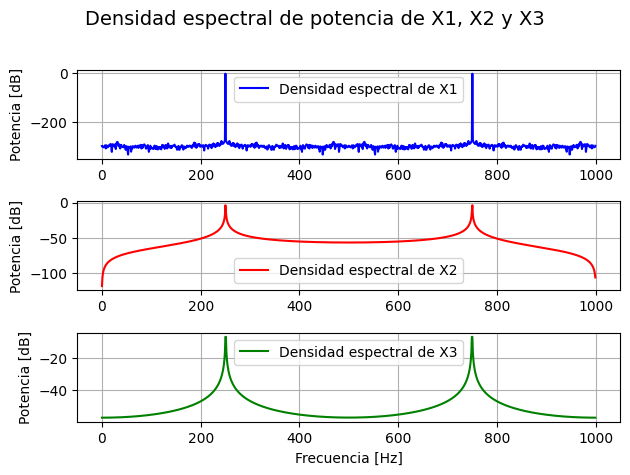

In [11]:
plt.figure()

# X1
plt.subplot(3,1,1)
plt.plot(Ff, 10*np.log10(X1_abs_cuadrado), color="blue", label="Densidad espectral de X1")
plt.ylabel("Potencia [dB]")
plt.legend()
plt.grid(True)

# X2
plt.subplot(3,1,2)
plt.plot(Ff, 10*np.log10(X2_abs_cuadrado), color="red", label="Densidad espectral de X2")
plt.ylabel("Potencia [dB]")
plt.legend()
plt.grid(True)

# X3
plt.subplot(3,1,3)
plt.plot(Ff, 10*np.log10(X3_abs_cuadrado), color="green", label="Densidad espectral de X3")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.legend()
plt.grid(True)

plt.suptitle("Densidad espectral de potencia de X1, X2 y X3", fontsize=14)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

## Resultados

La frecuencia de la primera señal coincide exactamente con un múltiplo entero de la resolución espectral delta f (fs/N); por lo tanto, el espectro muestra un pico bien definido con toda la energía concentrada en esa muestra; por lo tanto, no hay desparramiento de energía hacia otras frecuencias.

Por otro lado, las otras dos señales, al encontrarse desintonizadas, presentan un desparramiento de la energía; esto significa que la energía no queda concentrada en un solo lugar, sino que en varios. Esto sucede porque la frecuencia no coincide con una frecuencia muestreada por la DFT. Cuanta mayor es la desintonía, más se ensucia el espectro. 

Aunque la diferencia en frecuencia es muy pequeña, el espectro se ve mucho más ancho y con lóbulos, porque la FFT no puede representarlo en un único lugar. 

## Punto b

In [13]:
energia_tiempo_1 = np.sum(np.abs(x1)**2) / N
energia_frec_1   = np.sum(np.abs(X1)**2)
if energia_tiempo_1 == energia_frec_1:
    print("se cumple parseval")
else:
    print("no se cumple")
    
energia_tiempo_2 = np.sum(np.abs(x2)**2) / N
energia_frec_2   = np.sum(np.abs(X2)**2)
if energia_tiempo_2 == energia_frec_2:
    print("se cumple parseval")
else:
    print("no se cumple")

energia_tiempo_3 = np.sum(np.abs(x3)**2) / N
energia_frec_3   = np.sum(np.abs(X3)**2)
if energia_tiempo_3 == energia_frec_3:
    print("se cumple parseval")
else:
    print("no se cumple")

se cumple parseval
se cumple parseval
no se cumple


## Resultados

Podemos ver como en 2 de los 3 casos se conserva la energia en el dominio de la frecuencia con respecto al del tiempo

## Punto C

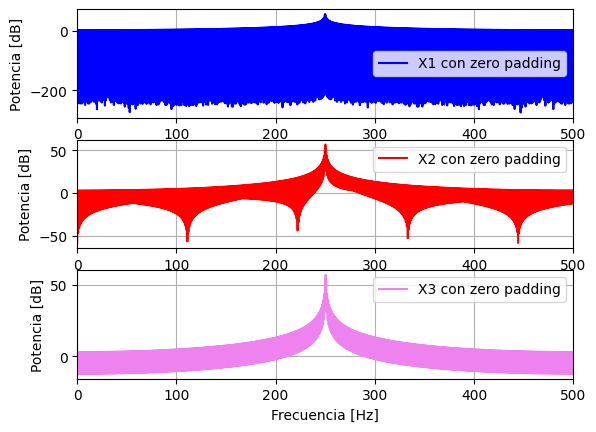

In [16]:
delta_f_padding = fs / (9*N)
Ff_padding = np.arange(9*N)*delta_f_padding

x1_padding = np.zeros(9*N)
x1_padding[:len(x1)] = x1
#ahora transformo, paso del espectro de tiempo a frecuencia
X1_padding_fft = fft(x1_padding)
X1_padding_fft_modulo = np.abs(X1_padding_fft)**2 #densidad espectral de potencia
#creo el eje x con las frecuencias pero con 10N para que no me tire el problema de dimensiones

x2_padding = np.zeros(9*N)
x2_padding[:len(x2)] = x2
#ahora transformo, paso del espectro de tiempo a frecuencia
X2_padding_fft = fft(x2_padding)
X2_padding_fft_modulo = np.abs(X2_padding_fft)**2 #densidad espectral de potencia
#creo el eje x con las frecuencias pero con 10N para que no me tire el problema de dimensiones

x3_padding = np.zeros(9*N)
x3_padding[:len(x3)] = x3
#ahora transformo, paso del espectro de tiempo a frecuencia
X3_padding_fft = fft(x3_padding)
X3_padding_fft_modulo = np.abs(X3_padding_fft)**2 #densidad espectral de potencia
#creo el eje x con las frecuencias pero con 10N para que no me tire el problema de dimensiones


plt.figure()

# X1 con zero padding
plt.subplot(3,1,1)
plt.plot(Ff_padding, 10*np.log10(X1_padding_fft_modulo), label="X1 con zero padding", color="blue")
plt.xlim([0,fs/2])
plt.ylabel("Potencia [dB]")
plt.legend()
plt.grid(True)

# X2 con zero padding
plt.subplot(3,1,2)
plt.plot(Ff_padding, 10*np.log10(X2_padding_fft_modulo), label="X2 con zero padding", color="red")
plt.xlim([0,fs/2])
plt.ylabel("Potencia [dB]")
plt.legend()
plt.grid(True)

# X3 con zero padding
plt.subplot(3,1,3)
plt.plot(Ff_padding, 10*np.log10(X3_padding_fft_modulo), label="X3 con zero padding", color="violet")
plt.xlim([0,fs/2])
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.legend()
plt.grid(True)

## Resultados

Como podemos ver en los gráficos, podemos ver más puntos de nuestra señal; de hecho, si hacemos zoom a los gráficos, podemos ver la presencia de la sinc. 

## Autoevaluación 

**Indicar una opción:**

* Resolví la tarea con seguridad ✅
* Resolví la tarea, pero tengo dudas 
* Resolví la tarea, pero no entendí bien
* No pude resolverla y no entendí

Responder:

**¿Qué aprendiste al hacer esta tarea? ¿Qué te quedó claro? ¿Qué te sigue costando?**

Realizar el TP me fue sencillo ya que logramos resolverlo en su totalidad durante la clase, analizando los resultados entre todos. Creo haber comprendido los temas en profundiad. 

**Indicar si se utilizó IA:**

* Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra. ✅
* No usé IA.

**En caso afirmativo, indicar una opción o varias:**

* Escritura ❌
* Código ✅ → LaTeX de las fórmulas
* Conceptos teóricos ❌
* Gráficos ✅ Para arrmar los subplots. 
* Conclusiones ❌